In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
#from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils.multiclass import unique_labels
from sklearn.ensemble import RandomForestClassifier

#PDdata = pd.read_csv('pd_speech_features.csv', sep=',')

#PDdata.shape

In [38]:
#resultAfterSMOTE.csv
#resultKBest
#resultETC.csv
from sklearn.preprocessing import MinMaxScaler


PDdata = pd.read_csv('resultKBest.csv', sep=',')
#print(PDdata)

<Figure size 432x288 with 0 Axes>

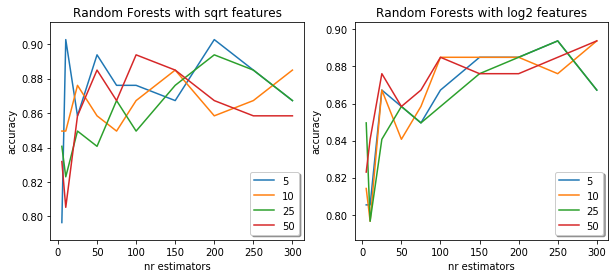

In [39]:
def multiple_line_chart(ax: plt.Axes, xvalues: list, yvalues: dict, title: str, xlabel: str, ylabel: str, miny=0.5, maxy=0.9, percentage=False):
    legend: list = []
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if percentage:
        ax.set_ylim(miny-0.01, maxy+0.01)
    for name, y in yvalues.items():
        ax.plot(xvalues, y)
        legend.append(name)
    ax.legend(legend, loc='best', fancybox = True, shadow = True) 
    

    
def plot_confusion_matrix(ax: plt.Axes, cnf_matrix: np.ndarray, classes_names: list, normalize: bool = False):
    if normalize:
        total = cnf_matrix.sum(axis=1)[:, np.newaxis]
        cm = cnf_matrix.astype('float') / total
        title = "Normalized confusion matrix"
    else:
        cm = cnf_matrix
        title = 'Confusion matrix'
    np.set_printoptions(precision=2)
    tick_marks = np.arange(0, len(classes_names), 1)
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes_names)
    ax.set_yticklabels(classes_names)
    ax.imshow(cm, interpolation='nearest', cmap=CMAP)

    fmt = '.2f' if normalize else 'd'
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt), horizontalalignment="center")
 
    
    
    
    
def plot_roc_chart(ax: plt.Axes, models: dict, tstX, tstY, target: str='class'):
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    ax.set_xlabel('FP rate')
    ax.set_ylabel('TP rate')
    ax.set_title('ROC chart for %s'%target)
    ax.plot([0, 1], [0, 1], color='navy', label='random', linestyle='--')
    
    for clf in models:
        scores = models[clf].predict_proba(tstX)[:,1]
        fpr, tpr, _ = metrics.roc_curve(tstY, scores,  pos_label=1)
        roc_auc = metrics.roc_auc_score(tstY, scores)
        ax.plot(fpr, tpr, label='%s (auc=%0.2f)' %(clf, roc_auc))
    ax.legend(loc="lower center")










y: np.ndarray = PDdata.pop('class').values
X: np.ndarray = PDdata.values
labels = pd.unique(y)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

n_estimators = [5, 10, 25, 50, 75, 100, 150, 200, 250, 300]
max_depths = [5, 10, 25, 50]
max_features = ['sqrt', 'log2']

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(10, 4), squeeze=False)
for k in range(len(max_features)):
    f = max_features[k]
    values = {}
    miny = 1
    maxy = 0
    for d in max_depths:
        yvalues = []
        for n in n_estimators:
            rf = RandomForestClassifier(n_estimators=n, max_depth=d, max_features=f)
            rf.fit(trnX, trnY)
            prdY = rf.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
        values[d] = yvalues
        if min(yvalues) < miny:
            miny = min(yvalues)
        if max(yvalues) > maxy:
            maxy = max(yvalues)
    multiple_line_chart(axs[0, k], n_estimators, values, 'Random Forests with %s features'%f, 'nr estimators', 
                             'accuracy', miny, maxy, percentage=True)
    
plt.show()

0.7522123893805309
Specificity:  0.79
Sensitivity:  0.71
0.7964601769911505
Specificity:  0.84
Sensitivity:  0.75


<Figure size 432x288 with 0 Axes>

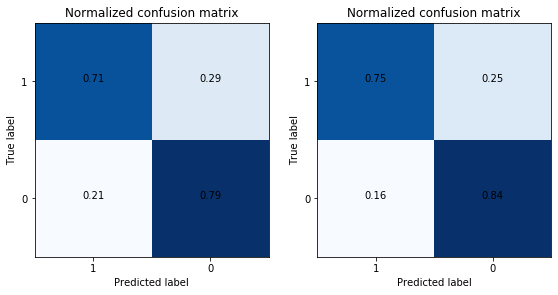

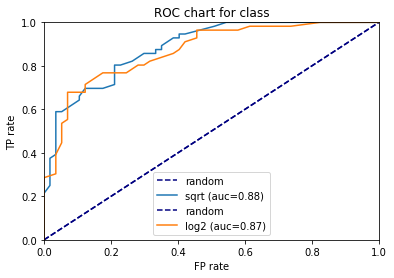

In [44]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, confusion_matrix, multilabel_confusion_matrix

PDdata = pd.read_csv('resultKBest.csv', sep=',')
import itertools
d1,d2 = 10,25
n1 = 50
n2 = 50

y: np.ndarray = PDdata.pop('class').values
X: np.ndarray = PDdata.values
labels = pd.unique(y)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

rf1 = RandomForestClassifier(n_estimators=n1, max_depth=d1, max_features='sqrt')
rf1.fit(trnX, trnY)
prdY1 = rf1.predict(tstX)

rf2 = RandomForestClassifier(n_estimators=50, max_depth=25, max_features='log2')
rf2.fit(trnX, trnY)
prdY2 = rf2.predict(tstX)

print(metrics.accuracy_score(tstY, prdY1))
tn, fp, fn, tp = confusion_matrix(tstY, prdY1).ravel()
specificity = tn / (tn+fp)
print("Specificity: ", round(specificity,2))
sensitivity = tp / (tp + fn)
print("Sensitivity: ", round(sensitivity,2))


print(metrics.accuracy_score(tstY, prdY2))
tn, fp, fn, tp = confusion_matrix(tstY, prdY2).ravel()
specificity = tn / (tn+fp)
print("Specificity: ", round(specificity,2))
sensitivity = tp / (tp + fn)
print("Sensitivity: ", round(sensitivity,2))




plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(8, 4), squeeze=False)
CMAP = plt.cm.Blues
plot_confusion_matrix(axs[0,0], metrics.confusion_matrix(tstY, prdY1, labels), labels, normalize=True)
plot_confusion_matrix(axs[0,1], metrics.confusion_matrix(tstY, prdY2, labels), labels, normalize=True)
plt.tight_layout()
plt.show()
plt.figure()
plot_roc_chart(plt.gca(), {'sqrt': rf1}, tstX, tstY, 'class')
plot_roc_chart(plt.gca(), {'log2': rf2}, tstX, tstY, 'class')
plt.show()


